<https://matplotlib.org/stable/tutorials/advanced/>
+ 这里有matplotlib各个大的模块的概述和说明，先看这个，再去看具体的函数使用那些，会比较好理解
+ 比如：
    + <https://matplotlib.org/stable/tutorials/intermediate/artists.html>
    + <https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html>
+ 已经有人翻译过这个了，这个部分变动一般不大，所以翻译时间早也没关系，详见：
    + 网页pdf：<https://usermanual.wiki/Document/matplotlibuserguide.1208853086.pdf>
    + 在线gitbook：<https://wizardforcel.gitbooks.io/matplotlib-user-guide/content/3.5.html>

In [1]:
%matplotlib ipympl

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


关于jupyter lab的交互模式显示， 要在plot之前就使用交互式模式，同时如果要换除了inline之外的交互模式，需要重新载入程序（清空之前已经在上一个交互后端画了的plot内容，重新载入新的交互后端）

参考：
+ <https://ipython.readthedocs.io/en/stable/interactive/magics.html>
+ [Javascript Error: IPython is not defined in JupyterLab](https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab)

# 一. Shapes and collections

来自: <https://matplotlib.org/stable/gallery/shapes_and_collections/arrow_guide.html>

## 1. Arrow guide

在plot中使用箭头patches。(patches,形状，ppt里形状就包含：圆形，箭头，方形等，和普通的函数曲线不同，这些是形状，有点像矢量)
+ 使用plot绘图时，经常会用箭头来进行指示，下面会演示下随着空间数据尺度变换，箭头的变换情况
+ 一般来说，显示在plot图像上的点，
    + 要么就是固定在“数据空间”（形状会随着坐标轴尺度而变换，即大小是相对于坐标轴尺度），
    + 要么就是固定在“显示空间”（不管坐标轴尺度如何，一直显示那么大，即：大小是相对于显示器的size）
+ 对于plot中固定在数据空间的点，其会随着数据尺度变化而移动，比如常规的散点图上的点
+ 对于plot中固定在显示空间的点，数据尺度变化，点的位置依然保持不变，比如图像标题或者label等内容

箭头，由起点和终点间的一个头（也可能是尾，三角形）和一段的杆（长方形）组成，起点和终点称为锚点（Anchor Points）

根据箭头的头部和锚点是固定在数据空间还是显示空间，可以有三种用途：
+ 头部形状固定在显示空间，锚点固定在数据空间
+ 头部形状和锚点都固定在显示空间
+ 整个箭头都固定在数据空间

### 1.头部固定在显示空间，锚点固定在数据空间

In [3]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

x_tail,y_tail = (0.1,0.5)
x_head,y_head = (0.9,0.8)
dx = x_head - x_tail
dy = y_head - y_tail

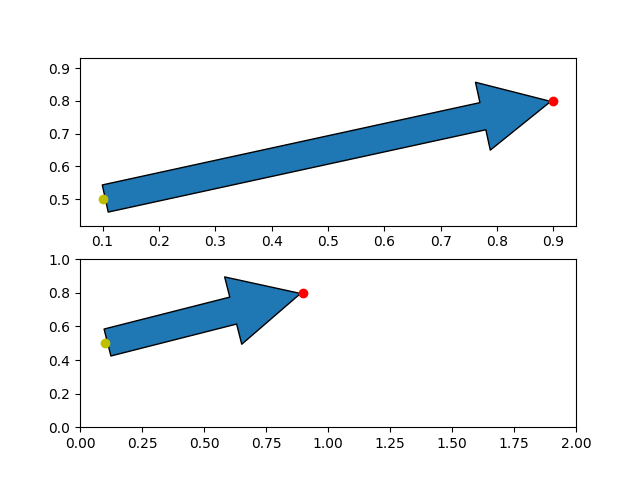

In [4]:
fig, axs = plt.subplots(nrows=2)
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[0].add_patch(arrow)
# axs[0].plot([x_tail,x_head],[y_tail,y_head],'w-o')
axs[0].plot([x_tail],[y_tail],'y-o')
axs[0].plot([x_head],[y_head],'r-o')

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[1].add_patch(arrow)
axs[1].set(xlim=(0, 2), ylim=(0,1))
axs[1].plot([x_tail],[y_tail],'y-o')
axs[1].plot([x_head],[y_head],'r-o')

关于`FancyArrowPatch`函数的说明：
+ 第一个输入的位置参数是tail（箭头杆的尾巴中间），第二个是head（三角形尖尖的顶点）
+ 头形状固定在显示空间，尾节点固定在数据空间
+ 但是当axis发生变化时，箭头的尺寸和形状（在显示空间）不会发生改变


```
The head and tail positions are fixed at the specified start and end points
of the arrow, but the size and shape (in display coordinates) of the arrow
does not change when the axis is moved or zoomed.
```

也就是可以认为：
+ matplotlib里的箭头，是由一个三角形+一个矩形共同构成的
+ 三角形就是头部，另外三角形的一个顶点和矩形某个边的中间点共同构成了两个控制点（锚点）
+ 头部固定在显示空间，即：上图，当轴的尺度发生变化后，箭头的三角形头部的形状和大小并没有发生改变，**可能旋转了一个角度，但是其大小和形状没变**
+ 两个起始的锚点固定在数据空间，所以可以两个锚点（尾巴/终点，黄色； 箭头/起点，红色）在图像上的位置发生了变化，但是坐标没有改变

和PPT里箭头控制的锚点差距很大

![img](./image/arrow_PPT.jpg)

### 2.头部形状和锚点都固定在显示空间

如果在对一个plot的图像做标注，那么可能不太希望箭头在plot图像在移动或者缩放时发生位置或形状的改变，可以使用这个方法
+ 还是`patches.FancyArrowPatch`这个函数，但是这次要传入一个关于轴的参数`transform=ax.transAxes`，即这个patchs的移动不变是相对于哪个轴的
+ 使用这个参数之后，轴的尺度发生了改变，箭头的形状和位置也不会变

[How do I change the figure size with subplots?](https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots)

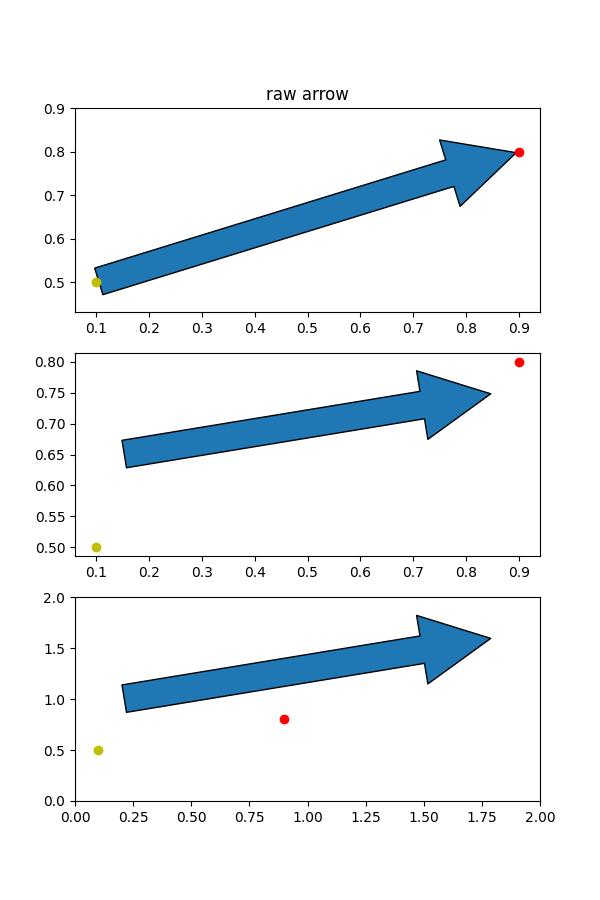

In [5]:
# %matplotlib ipympl
fig, axs = plt.subplots(nrows=3,figsize=(6,9))

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[0].add_patch(arrow)
# axs[0].plot([x_tail,x_head],[y_tail,y_head],'w-o')
axs[0].plot([x_tail],[y_tail],'y-o')
axs[0].plot([x_head],[y_head],'r-o')
axs[0].title.set_text("raw arrow")


arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100,transform=axs[1].transAxes)
axs[1].add_patch(arrow)
# axs[0].plot([x_tail,x_head],[y_tail,y_head],'w-o')
axs[1].plot([x_tail],[y_tail],'y-o')
axs[1].plot([x_head],[y_head],'r-o')

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100,transform=axs[2].transAxes)
axs[2].add_patch(arrow)
axs[2].set(xlim=(0, 2), ylim=(0,2))
axs[2].plot([x_tail],[y_tail],'y-o')
axs[2].plot([x_head],[y_head],'r-o')

交互模式下，改变全图的缩放情况，固定在轴上的箭头确实不会再改变了。
+ 但是很明显，这种情况下画出来的箭头，和原始的根据起始点的箭头，其实变小了一点
+ 所以此时给的锚点，只有参考价值，为了保持相对于轴的固定显示，对箭头的大小进行了一些处理

### 3. 头部和锚点都固定在数据空间

不是特殊的形状了，对箭头没有形状上的要求，所以直接使用默认就是固定在数据空间的普通箭头，`mpatches.Arrow`或者`patches.FancyArrow `函数

[(0.0, 2.0), (0.0, 2.0)]

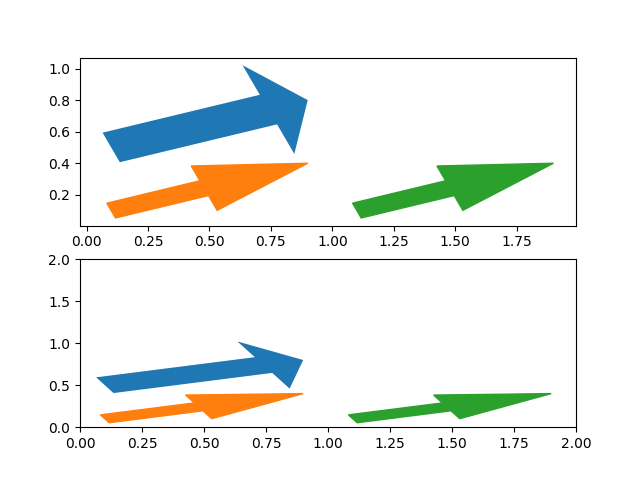

In [6]:
fig, axs = plt.subplots(nrows=2)

arrow = mpatches.Arrow(x_tail, y_tail, dx, dy)
axs[0].add_patch(arrow)
arrow = mpatches.FancyArrow(x_tail, y_tail - .4, dx, dy,
                            width=.1, length_includes_head=True, color="C1")
axs[0].add_patch(arrow)
axs[0].arrow(x_tail + 1, y_tail - .4, dx, dy,
             width=.1, length_includes_head=True, color="C2")

arrow = mpatches.Arrow(x_tail, y_tail, dx, dy)
axs[1].add_patch(arrow)
arrow = mpatches.FancyArrow(x_tail, y_tail - .4, dx, dy,
                            width=.1, length_includes_head=True, color="C1")
axs[1].add_patch(arrow)
axs[1].arrow(x_tail + 1, y_tail - .4, dx, dy,
             width=.1, length_includes_head=True, color="C2")
axs[1].set(xlim=(0, 2), ylim=(0, 2))

## 2. Matplotlib自带的形状

参考：<https://matplotlib.org/stable/gallery/shapes_and_collections/artist_reference.html>

In [1]:
# !pip install --upgrade matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.pyplot as plt

%matplotlib ipympl

一开始`fig, axs = plt.subplots(3, 3, figsize=(6, 6), layout="constrained")`这句报错：
```python
TypeError: __init__() got an unexpected keyword argument 'layout'
```

是因为matplotlib版本太旧了，更新一下

关于下面代码的说明：
+ `mpatches.Circle((0, 0), 0.1, ec="none")`，圆心（0,0），半径0.1的圆形，如果要显示到plot中央，需要把x轴和y轴范围调整到-0.2~0.2之间。ec是edgecolor，none就是没有边

In [63]:
x = [float(i[0]) for i in path]
y = [float(i[1]) for i in path]
x,y

([0.0, 0.1, 0.2], [0.0, 0.2, 0.1])

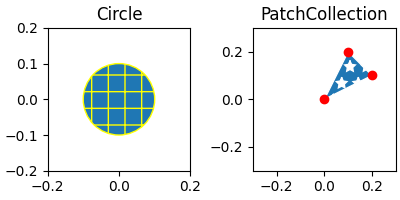

In [83]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib as mlp
import numpy as np

circle = mpatches.Circle((0, 0), 0.1, ec="yellow",hatch="+")
path = np.array([[0,0],[0.1,0.2],[0.2,0.1]])
patchWithPolygon = PatchCollection([mlp.patches.Polygon(path)], ec="white")
patchWithPolygon.set(hatch="*")

fig, axs = plt.subplots(1, 2, figsize=(4, 2), layout="constrained")
axs.flat[0].add_artist(circle)
# axs.flat[0].set_axis_off()
axs.flat[0].set(title=type(circle).__name__,
           aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))

axs.flat[1].add_collection(patchWithPolygon)
axs.flat[1].set(title=type(patchWithPolygon).__name__,
           aspect=1, xlim=(-.3, .3), ylim=(-.3, .3))

x = [float(i[0]) for i in path]
y = [float(i[1]) for i in path]
axs.flat[1].scatter(x,y,c='r')

plt.show()

完整的示例代码：

1. 矩形

```python
mpatches.Rectangle(xy, width, height, angle=0.0, **kwargs)

  :                +------------------+
  :                |                  |
  :              height               |
  :                |                  |
  :               (xy)---- width -----+
```

2. 楔形（扇形）

```python
mpatches.Wedge(center, r, theta1, theta2, width=None, **kwargs)
Docstring:      Wedge shaped patch.
Init docstring:
A wedge centered at *x*, *y* center with radius *r* that
sweeps *theta1* to *theta2* (in degrees).  If *width* is given,
then a partial wedge is drawn from inner radius *r* - *width*
to outer radius *r*.

*theta1* to *theta2*之间的内容会被清除掉,

90~0（逆时针，3点钟到12点方向之间消失）和0~90（逆时针，12点方向到3点钟方向之间大块消失）的结果不一样，可以自己看看

逆时针消除
```

3. 正多边形

```python
mpatches.RegularPolygon(xy, numVertices, radius=5, orientation=0, **kwargs)
xy:(float,float)，正多边形的中心
numVertices：正n多边形，例如：numVertices=8，画出来的就是正八边形
radius：中心到边的距离
orientation：正多边形旋转的角度（radians，弧度单位）
```

4. 椭圆形

```python
mpatches.Ellipse(xy, width, height, angle=0, **kwargs)

xy : (float, float),椭圆中心坐标
width : float，水平轴（长轴）的总体长度
height : float，竖轴（短轴）的总体长度
angle : float, default: 0，反时钟方向，单位角度°
```

5. 花哨的矩形

```python
比如：boxstyle=mpatches.BoxStyle("Round", pad=0.02)) 就是圆角矩形
```

6. 选择好看的colormaps，看：<https://matplotlib.org/stable/tutorials/colors/colormaps.html>


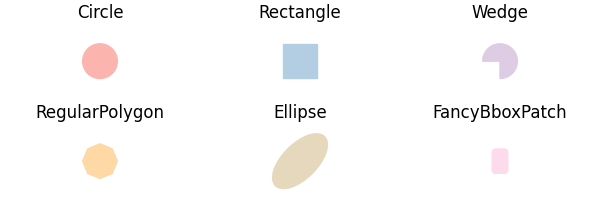

In [69]:
artists = [mpatches.Circle((0,0),0.1,ec="b",hatch='*'),
          mpatches.Rectangle((-0.1,-0.1),0.2,0.2,ec='b',hatch='|'),
          mpatches.Wedge((0,0),0.1,270,180,ec='b'),
          mpatches.RegularPolygon((0,0),8,radius=0.1,ec='b'),
          mpatches.Ellipse((0,0),0.4,0.2,45,ec="b"), 
          mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",boxstyle=mpatches.BoxStyle("Round", pad=0.02))]

fig, axs = plt.subplots(2, 3, figsize=(6, 2), layout="constrained")
for i,(ax,shape) in enumerate(zip(axs.flat,artists)):
    shape.set(color=mpl.colormaps["Pastel1"](i / len(artists)))
    ax.add_artist(shape)
    ax.set(title=type(shape).__name__,aspect=1,xlim=(-0.2,0.2),ylim=(-0.2,0.2))
    ax.set_axis_off()
plt.show()
# plt.close('all')

## 3. 对patches进行hatch(底纹填充)

来自：<https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_demo.html>

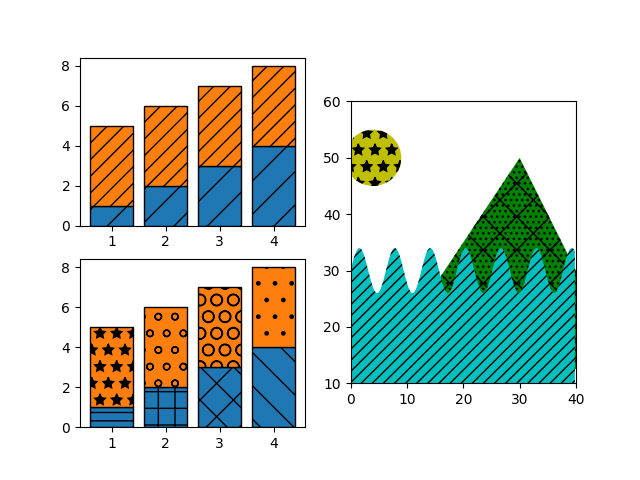

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

x = np.arange(1, 5)
y1 = np.arange(1, 5)
y2 = np.ones(y1.shape) * 4

fig = plt.figure()
axs = fig.subplot_mosaic([['bar1', 'patches'], ['bar2', 'patches']])

axs['bar1'].bar(x, y1, edgecolor='black', hatch="/")
axs['bar1'].bar(x, y2, bottom=y1, edgecolor='black', hatch='//')

axs['bar2'].bar(x, y1, edgecolor='black', hatch=['--', '+', 'x', '\\'])
axs['bar2'].bar(x, y2, bottom=y1, edgecolor='black',
                hatch=['*', 'o', 'O', '.'])

x = np.arange(0, 40, 0.2)
axs['patches'].fill_between(x, np.sin(x) * 4 + 30, y2=0,
                            hatch='///', zorder=2, fc='c')
axs['patches'].add_patch(Ellipse((4, 50), 10, 10, fill=True,
                                 hatch='*', facecolor='y'))
axs['patches'].add_patch(Polygon([(10, 20), (30, 50), (50, 10)],
                                 hatch='\\/...', facecolor='g'))
axs['patches'].set_xlim([0, 40])
axs['patches'].set_ylim([10, 60])
axs['patches'].set_aspect(1)
plt.show()
# plt.close("all")

# 二. add_artist vs add_patch vs add_collection

+ add_artist和add_patch，每次都是添加一个shape，add_collection则是添加一个集合的shape。
+ 相比于add_patch，add_artist不会自动调节轴的尺度，除非手动调用`update_datalim`方法来更新


参考：
+ [What is the difference between add_artist or add_patch](https://stackoverflow.com/questions/67075348/what-is-the-difference-between-add-artist-or-add-patch)
+ <https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_artist.html#matplotlib.axes.Axes.add_artist>


# 三. 使用PatchCollection绘制带圆圈的热力图

来自：<https://blog.csdn.net/KLZZ66/article/details/127751523>

参考：
+ matplotlib没有直接的支持热力图的api：
    + <https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html>
    + 一般就是imshow显示图像，配上plt.colorbar(）显示色谱
    + <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar>
+ 似乎如果是Dataframe的或者numpy数据，一般直接用seaborn来进行热力图的显示：
    + <https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe>
 
+ 选择好看的colormaps，看：<https://matplotlib.org/stable/tutorials/colors/colormaps.html>
+ 数字替换PatchCollection，<https://stackoverflow.com/questions/75858381/how-to-set-0-as-the-color-center-when-using-patchcollection-in-python>

### 1.普通的数字注释热力图

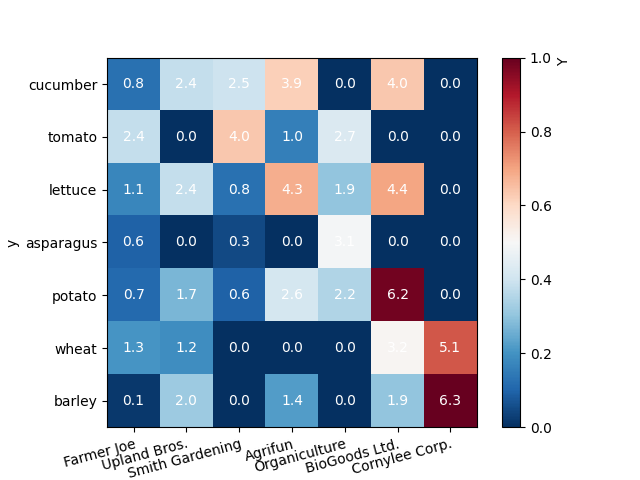

In [42]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
# %matplotlib inline
%matplotlib ipympl

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]


harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()

cb = plt.colorbar(matplotlib.cm.ScalarMappable(cmap = "RdBu_r"),location= "right")
cb.set_label('Y',loc='top')

# 1. 数字显示
# 默认以图像方式显示其实就和热力图效果差不多。。
im = ax.imshow(harvest,cmap='RdBu_r')
# imshow和matshow，对于热力图显示来说，是差不多的，x轴一个在上，一个在下
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html#matplotlib.pyplot.matshow
# im = ax.matshow(harvest,cmap='RdBu_r')

# 为每个格子设置数字label
for i in range(len(farmers)):
    for j in range(len(vegetables)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w",fontsize=10)
 # 设置x轴和y轴刻度是上面的类别
ax.set_xticks(np.arange(len(farmers)), labels=farmers,fontsize=10)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables,fontsize=10)
# ax.set_yticks(np.arange(len(vegetables)), np.arange(len(vegetables)),fontsize=10)

# 旋转x轴刻度，保证显示和对齐
plt.setp(ax.get_xticklabels(), rotation=15, ha="right",
         rotation_mode="anchor")
plt.autoscale(enable=True, axis='both', tight=True)
ax.set_xlabel('X')
ax.set_ylabel('y')
# 这个label设置参考：
# <https://matplotlib.org/stable/gallery/shapes_and_collections/ellipse_collection.html#sphx-glr-gallery-shapes-and-collections-ellipse-collection-py>

plt.show()
# plt.close("all")

### 2. PatchCollection替换的热力图

In [24]:
a=[1,2,3]
print(a[::-1])

[3, 2, 1]


In [4]:
np.set_printoptions(precision=5,suppress=True)
R

array([[0.06349, 0.19048, 0.19841, 0.30952, 0.     , 0.31746, 0.     ],
       [0.19048, 0.     , 0.31746, 0.07937, 0.21429, 0.     , 0.     ],
       [0.0873 , 0.19048, 0.06349, 0.34127, 0.15079, 0.34921, 0.     ],
       [0.04762, 0.     , 0.02381, 0.     , 0.24603, 0.     , 0.     ],
       [0.05556, 0.13492, 0.04762, 0.20635, 0.1746 , 0.49206, 0.     ],
       [0.10317, 0.09524, 0.     , 0.     , 0.     , 0.25397, 0.40476],
       [0.00794, 0.15873, 0.     , 0.11111, 0.     , 0.15079, 0.5    ]])

Text(0, 0.5, 'y')

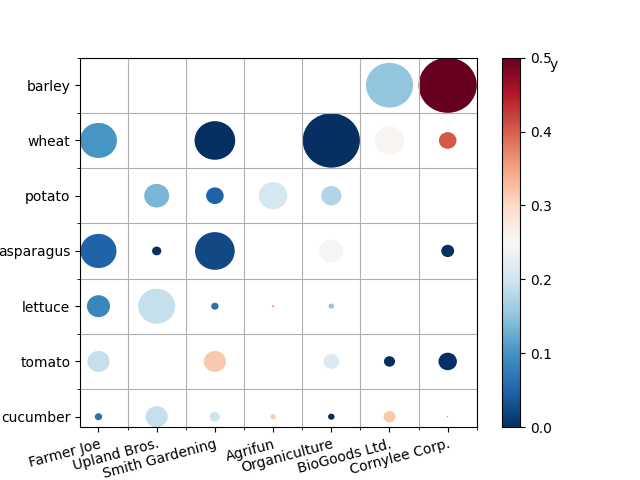

In [65]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus","potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]


harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

# 2.PatchCollection显示
# 把数字格子换成PatchCollection,对应(x,y)格子上的数值作为半径
fig2, ax2 = plt.subplots()

# 这里控制显示的浮点数长度参考：<https://blog.csdn.net/Castlehe/article/details/116018385>
# for i in range(0,len(farmers)):
#     for j in range(0,len(vegetables)):
#         text = ax2.text(j, i, f"{R[i, j]:{5}.{2}}",ha="center", va="center", color="black",fontsize=10)  
        
allCircles=[]
R = harvest/harvest.max()/2
xLen = len(farmers)
yLen= len(vegetables)
for i in range(xLen):
    for j in range(yLen):
        allCircles.append(mpatches.Circle((j,i),R[j][i]))
                          
col = PatchCollection(allCircles, array =R.flat, cmap="RdBu_r")
# 也可以使用下面这种写法
# p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
# p.set_array(colors)

ax2.add_collection(col)
# col.set_clim(0,1)  # 这个设置的是colorbar的vmin和vmax
# 由于PatchCollection里已经有cmap了，所以就不用再从头创建colorbar了
# cb = plt.colorbar(matplotlib.cm.ScalarMappable(cmap = "RdBu_r"),location= "right")
# cb.set_label('Y',loc='top')

colorbar = plt.colorbar(col)
colorbar.set_label('y', rotation=360,loc="top")

# 这里默认设置主要刻度
ax2.set_xticks(np.arange(len(farmers)), labels=farmers,fontsize=10)
ax2.set_yticks(np.arange(len(vegetables)), labels=vegetables,fontsize=10)
# ax.set_yticks(np.arange(len(vegetables)), np.arange(len(vegetables)),fontsize=10)

# 关键是这里的这个minor参数，负责设置主要刻度还是次要刻度。
# If ``False``, set the major ticks; if ``True``, the minor ticks.
# 这里设置次要刻度，有了次要刻度后，每个圆心都对应次要刻度
ax2.set_xticks(np.arange(7+1)-0.5,minor=True)
ax2.set_yticks(np.arange(7+1)-0.5,minor=True)
ax2.grid(which='minor')

# 旋转x轴刻度，保证显示和对齐
plt.setp(ax2.get_xticklabels(), rotation=15, ha="right",
         rotation_mode="anchor")
plt.autoscale(enable=True, axis='both', tight=True)
ax2.set_xlabel('X')
ax2.set_ylabel('y')

把上面关于数字显示部分的代码取消注释，这里有些格子是空的，是因为R是0。。。
+ 即：原始的数据里是0，所以画出来的圆形半径是0.
+ 和colorbar的颜色显示无关，并不是因为值是0.5左右，所以显示白色了

### 3.结论

**关于为什么数字和PatchCollection显示是转置关系（y轴是反的）**

> 可以看到(取消`ax.set_yticks(np.arange(len(vegetables)), np.arange(len(vegetables)),fontsize=10)
`这行的注释)：
> + 对于imshow来说，左上角是原点，y轴从上到下是0-6
> + 对于plot来说，左下角是原点，y轴从上到下是6-0
>  + 所以上面两种显示方式有区别

### 4. 其他示例（值0为白色）

来自：<https://stackoverflow.com/questions/75858381/how-to-set-0-as-the-color-center-when-using-patchcollection-in-python>

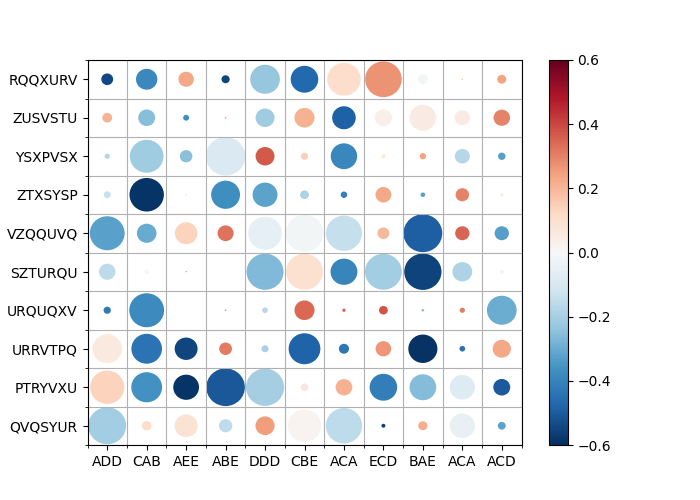

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.6

fig, ax = plt.subplots(figsize=(7, 5))

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdBu_r",norm=mpl.colors.Normalize(vmin=-0.6, vmax=0.6))
# col = PatchCollection(circles, array=c.flatten(), cmap="RdBu_r")
# norm=mpl.colors.Normalize(vmin=-0.6, vmax=0.6)就是把color值范围缩放到0.6~-0.6之间，这样白色就在中间了，把color弄成对称的就行
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()

如果是`ipympl`而不是`inline`模式，则x轴的ticklabels会有一部分显示不出来。。没有相关的issue

# 四. 基于PatchCollection绘制目标检测标签（猫咪数据集）

这部分代码运行前要先解压猫咪和气球两个数据集

## 1.使用pycocotools进行显示

In [120]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

dataDir= "datasets/cat_dataset/images"

annFile='datasets/cat_dataset/annotations/annotations_all.json'

coco = COCO(annotation_file=annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [118]:
coco.getCatIds('cat')

[1]

**查看标注**
+ 这个数据集的bbox和segmentation（四个顶点序列，长度8）是一样的，所以看不到很精准的segmentation

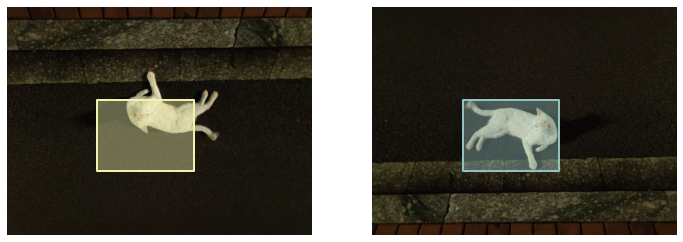

In [68]:
from PIL import ImageOps
ids=[1]
img = coco.loadImgs(ids)[0]
img_name = img.get("file_name")
img_prefix = os.path.join(dataDir,img_name)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
image=Image.open(img_prefix)
plt.axis('off')
plt.imshow(image)

annsId = coco.getAnnIds(ids)
bbox = coco.loadAnns(annsId)[0]
coco.showAnns([bbox],draw_bbox=False)

plt.subplot(1,2,2)
imageWithEXIF=ImageOps.exif_transpose(image)
plt.axis('off')
plt.imshow(imageWithEXIF)
coco.showAnns([bbox],draw_bbox=False)

所以这个数据集确实图像方向有点问题。。果然是自己手机拍的，就会有这个情况，如果是医疗影像或者遥感图像，就不会有这个问题

## 2.自定义显示目标检测框+类别

+ 其实视频课程里的那个代码就是从 pycocotools里抽的：[cocoapi/PythonAPI/pycocotools
/coco.py-> showAnns函数](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L233)
+ 主要逻辑基本一模一样。。
+ 圆角矩形绘制,参考：
   + <https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html>
   + <https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html#sphx-glr-gallery-shapes-and-collections-fancybox-demo-py>

In [115]:
from pycocotools.coco import COCO
import numpy as np
import os.path as osp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def show_box_only(coco,anns,show_label_bbox=True,is_filling=True):
    """
    coco:定义的coco对象
    anns:coco对象里得到的标注对象
    show_label_bbox：是否显示标签
    is_filling：是否对box进行填充
    """
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    
    # 如果是多类别，每个类别的标签背景一个颜色,
    # 由于这里每次传入一个图像的标注（下面的for循环是一个图像多个标记），
    # 如果用随机数生成颜色会乱，所以如果是多类别，自己给每个类别指定一个颜色就可以
    image2color = dict()
    image2color[0]="orchid"
    image2color[1]="tab:blue"
    image2color[2]="pink"
    
    for ann in anns:
        # 随机生成一个0~1之间的数，作为box颜色
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        # 获取bbox坐标
        [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
        # Polygon需要接受四个点的坐标，顺时针或者逆时针都行
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
        np_poly = np.array(poly).reshape((4,2))
        polygons.append(Polygon(np_poly))
        color.append(c)
        
        # 显示label文字
        if show_label_bbox:
            label_box = dict(facecolor =image2color[ann['category_id']], boxstyle="Round")
            # print(image2color[ann['category_id']])
            ax.text(bbox_x, bbox_y, f"{coco.loadCats(ann['category_id'])[0]['name']}", color="white",fontsize=10,bbox=label_box)
        else:
            pass
    if is_filling:
        # 显示前景色
        p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    # 只画框
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

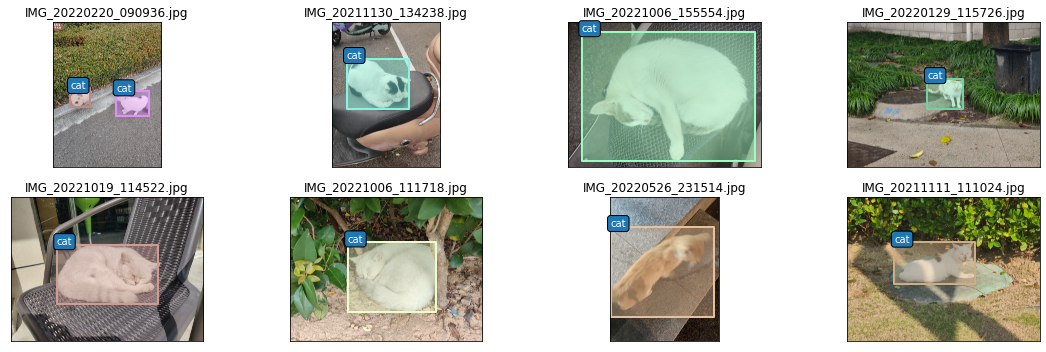

In [121]:
import os

image_ids=coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16,5))
for i in range(8):
    image_data=coco.loadImgs(image_ids[i])[0]
    img_path = os.path.join(dataDir,image_data.get("file_name"))

    annotation_ids = coco.getAnnIds(imgIds=image_data['id'])
    annotation = coco.loadAnns(annotation_ids)

    ax=plt.subplot(2,4,i+1)
    image = Image.open(img_path)
    imageWithEXIF=ImageOps.exif_transpose(image)
    ax.imshow(imageWithEXIF)
    
    show_box_only(coco,annotation)
    plt.title(image_data["file_name"])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

试试显示气球的

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


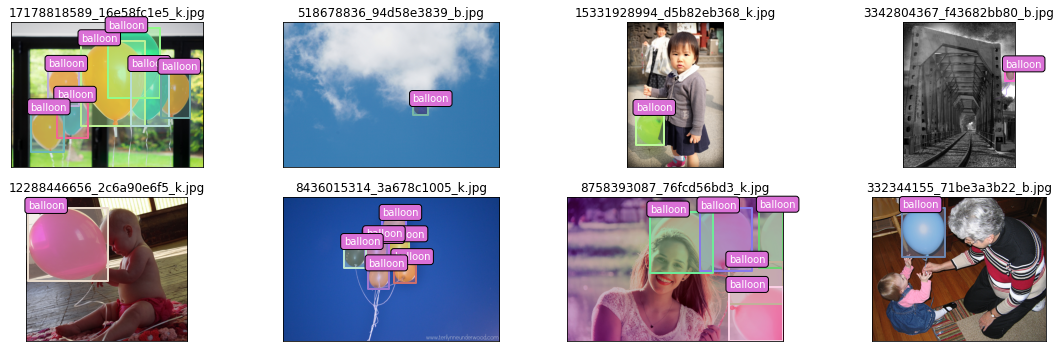

In [116]:
dataDir= "datasets/balloon"
dataType="train"

annFile="datasets/annotations/train_coco.json"

coco = COCO(annotation_file=annFile)

import os

image_ids=coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16,5))
for i in range(8):
    image_data=coco.loadImgs(image_ids[i])[0]
    img_path = os.path.join(dataDir,dataType,image_data.get("file_name"))

    annotation_ids = coco.getAnnIds(imgIds=image_data['id'])
    annotation = coco.loadAnns(annotation_ids)

    ax=plt.subplot(2,4,i+1)
    image = Image.open(img_path)

    ax.imshow(image)
    show_box_only(coco,annotation)
    plt.title(image_data["file_name"])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

这样气球就全是紫色的了，类别0设置的紫色，哈哈哈

# 五.基于PatchCollection绘制语义分割里的标签（气球数据集）

和上面的逻辑其实差不多，区别在于COCO里的`segmentation`有两种表示方式，
1. 列表形式的多边形；
2. RLE（类似mask图像），可以看看：[Coco数据集中的rle格式处理](https://blog.csdn.net/xx_xjm/article/details/126608359),有点像对图像进行base64编码的结果。。

```bash
"segmentation": RLE or [polygon] 
```

In [125]:
def show_seg(coco,anns,is_filling=True):
    """
    coco:定义的coco对象
    anns:coco对象里得到的标注对象
    show_label_bbox：是否显示标签
    is_filling：是否对box进行填充
    """
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    
    # 如果是多类别，每个类别的标签背景一个颜色,
    # 由于这里每次传入一个图像的标注（下面的for循环是一个图像多个标记），
    # 如果用随机数生成颜色会乱，所以如果是多类别，自己给每个类别指定一个颜色就可以
    image2color = dict()
    image2color[0]="orchid"
    image2color[1]="tab:blue"
    image2color[2]="pink"
    
    for ann in anns:
        # 随机生成一个0~1之间的数，作为box颜色
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        # 获取polygon多边形，
        if 'segmentation' in ann and type(ann['segmentation']) == list: # 说明是polygon类型
            for seg in ann['segmentation']:
                # ann['segmentation']是list，但是一般只有ann['segmentation'][0]这一个分割标注
                # 具体数据集具体看，气球数据集是这样（可能是因为既有box，又有seg的原因）
                poly = np.array(seg).reshape((int(len(seg)/2), 2))
                polygons.append(Polygon(poly))
                color.append(c)

                # 显示label
                label_box = dict(facecolor =image2color[ann['category_id']], boxstyle="Round")
                ax.text(seg[0], seg[1], f"{coco.loadCats(ann['category_id'])[0]['name']}", color="white",fontsize=10,bbox=label_box)
                # print(image2color[ann['category_id']])
        else:
            return

    if is_filling:
        # 显示前景色
        p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    # 只画框
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


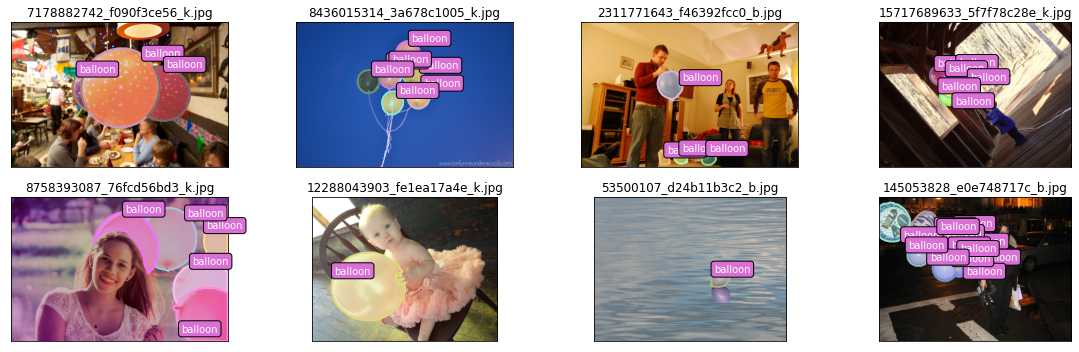

In [126]:
dataDir= "datasets/balloon"
dataType="train"

annFile="datasets/annotations/train_coco.json"

coco = COCO(annotation_file=annFile)

import os

image_ids=coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16,5))
for i in range(8):
    image_data=coco.loadImgs(image_ids[i])[0]
    img_path = os.path.join(dataDir,dataType,image_data.get("file_name"))

    annotation_ids = coco.getAnnIds(imgIds=image_data['id'])
    annotation = coco.loadAnns(annotation_ids)

    ax=plt.subplot(2,4,i+1)
    image = Image.open(img_path)

    ax.imshow(image)
    show_seg(coco,annotation)
    plt.title(image_data["file_name"])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

OK啦，整体逻辑确实很简单